<a href="https://colab.research.google.com/github/Nagarani1664/projectmlcredit_card_fraud_detection/blob/main/creditcard_Fraud_detectionproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv.zip')


In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
# distribution of legit Transcation and Fradulent Transcation
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This data set is highly unbalanced



0 --->Normal Transcation


1 -->Fradulent Transcation

In [9]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [12]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [13]:
# compare values for both of Transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# under Sampling

# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fradulent Transactions -->492

There  are about 284315 legit Transactions ..We are gonna take 492 Randam Legit Transactions And join with fraud Transactions..So By this We will have 492 Legal Transactions And Fraud Transactions..It be a uniform dataset to feed the machine Learning Model

In [15]:
legit_sample = legit.sample(n=492)


In [16]:
# Concatenating two Data Frames

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis =0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246060,153021.0,-0.256774,1.099018,-0.069767,-0.773796,1.554430,-0.422271,1.152748,-0.174711,-0.558541,-1.220684,-1.077037,0.206555,1.251377,-1.195680,-0.300435,0.370861,0.136297,-0.107544,0.178603,0.048881,-0.292545,-0.787518,-0.129654,0.025658,-0.283750,0.162077,0.092263,0.177497,1.29,0
186460,127114.0,0.050587,0.814119,0.710136,0.940384,0.366064,-0.373093,0.703352,-0.403011,-0.580983,0.744859,1.193231,0.576402,0.107057,0.304771,0.562794,-1.166518,0.337667,0.056252,3.124717,0.243763,-0.122268,-0.099760,0.046986,0.116382,-1.186152,0.470916,-0.239297,-0.004509,1.98,0
98055,66497.0,1.299595,0.177898,-0.032774,0.186570,0.279107,0.124762,-0.025356,-0.002748,-0.200804,0.086567,0.355530,0.885267,0.988005,0.252844,0.374833,0.872279,-1.197319,0.334416,0.677132,0.009704,-0.284801,-0.843630,-0.056557,-1.021182,0.383654,0.158930,-0.032627,-0.002580,8.98,0
59494,48865.0,1.438922,-1.188090,0.397268,-1.468877,-1.495253,-0.288240,-1.239314,0.156517,-1.785162,1.630103,1.077261,-1.239848,-1.741725,0.341575,0.351914,-0.397735,0.658086,0.265752,-0.297446,-0.493712,-0.161844,-0.169021,0.080213,-0.063838,0.213647,-0.186260,0.029397,0.002135,10.00,0
22560,32309.0,1.002744,-0.273521,-0.430104,0.972593,0.641415,1.174992,0.106976,0.198267,0.107781,-0.016521,-0.350063,0.750200,0.289453,0.151217,-0.673071,-0.015433,-0.621402,0.083506,0.531720,0.141596,-0.086015,-0.311985,-0.400628,-1.691188,0.823694,-0.236396,0.011526,0.010297,133.00,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_dataset['Class'].value_counts()


,count
Class,
0,492
1,492


In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91765.197154,0.151759,-0.043166,-0.012993,0.052139,0.034228,0.097172,0.014247,0.036925,-0.067260,-0.055274,-0.002799,-0.014656,-0.035179,0.060192,-0.013244,0.025049,0.049229,-0.061129,-0.005475,0.025557,-0.004305,0.031921,-0.020924,-0.007088,-0.002426,0.029225,-0.016018,0.002082,96.644004
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
# by the above thing we can say that their average is similar to the previou average

In [26]:
# spliting the data into features and Target


In [27]:
X = new_dataset.drop(columns='Class' , axis =1)
Y = new_dataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3  ...       V26       V27       V28  Amount
246060  153021.0 -0.256774  1.099018 -0.069767  ...  0.162077  0.092263  0.177497    1.29
186460  127114.0  0.050587  0.814119  0.710136  ...  0.470916 -0.239297 -0.004509    1.98
98055    66497.0  1.299595  0.177898 -0.032774  ...  0.158930 -0.032627 -0.002580    8.98
59494    48865.0  1.438922 -1.188090  0.397268  ... -0.186260  0.029397  0.002135   10.00
22560    32309.0  1.002744 -0.273521 -0.430104  ... -0.236396  0.011526  0.010297  133.00
...          ...       ...       ...       ...  ...       ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653 -4.518331  ...  0.788395  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381 -5.004247  ...  0.739467  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366 -2.213700  ...  0.471111  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864 -5.399730  ...  0.606116  0.884876 -0.253700  245.00
281674  17

In [30]:
print(Y)

246060    0
186460    0
98055     0
59494     0
22560     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split The data into Training data and Testing data

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,random_state =2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [33]:
# Model Training
# LogisticRegression

** MODEL TRAINING**


**LOGISTIC REGRESSION**


In [34]:
modal = LogisticRegression()

In [37]:
# training the Logistic Regression Model with Training Data
modal.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODAL EVALUATION

ACCURACY SCORE

In [38]:
# accuracy on training data
X_train_prediction = modal.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [39]:
 print('Accuracy On Training data: ', training_data_accuracy)

Accuracy On Training data:  0.9466327827191868


In [40]:
# Accuracy on Test data
X_test_prediction = modal.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [41]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.9390862944162437


Accuracy On Training data:  0.9466327827191868
Accuracy on Test data :  0.9390862944162437


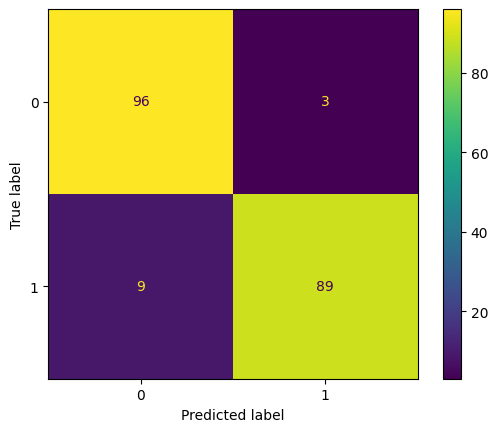

In [44]:
!pip install scikit-learn  # Ensures scikit-learn is installed
# importing the necessary modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # For plotting
# ... (your existing code) ...

# accuracy on training data
X_train_prediction = modal.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy On Training data: ', training_data_accuracy)

# Accuracy on Test data
X_test_prediction = modal.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data : ',test_data_accuracy)

# Generate and plot the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction) # Make sure X_test_prediction is the name of your variable
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show() # This explicitly displays the plot